<a href="https://colab.research.google.com/github/tzelleke/data-science-tutorial-notebooks/blob/master/loading_from_wikidata_and_displaying_interactive_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading data from WikiData and displaying it on an interactive map

In [ ]:
pip install sparqlwrapper

In [2]:
import pandas as pd
from SPARQLWrapper import SPARQLWrapper, JSON

sparql = SPARQLWrapper("https://query.wikidata.org/sparql")
sparql.setReturnFormat(JSON)

In [3]:
def q(query):
    sparql.setQuery(query)
    results = sparql.query().convert()
    return pd.json_normalize(results['results']['bindings'])

In [4]:
df = q("""
SELECT
?university ?universityLabel ?coord ?lat ?lon
WHERE {
  ?university wdt:P31 wd:Q875538;
              wdt:P17 wd:Q183.
  ?university wdt:P625 ?coord.
  ?university p:P625 ?coordinate.
  ?coordinate psv:P625 ?coordinate_node.
  ?coordinate_node wikibase:geoLatitude ?lat;
                   wikibase:geoLongitude ?lon.
  SERVICE wikibase:label { bd:serviceParam wikibase:language "de". }
}
""")

In [5]:
df.sample(5)

,university.type,university.value,coord.datatype,coord.type,coord.value,universityLabel.xml:lang,universityLabel.type,universityLabel.value,lat.datatype,lat.type,lat.value,lon.datatype,lon.type,lon.value
14,uri,http://www.wikidata.org/entity/Q1622101,http://www.opengis.net/ont/geosparql#wktLiteral,literal,Point(9.31103 48.7381),de,literal,Hochschule Esslingen,http://www.w3.org/2001/XMLSchema#double,literal,48.7381,http://www.w3.org/2001/XMLSchema#double,literal,9.31103
228,uri,http://www.wikidata.org/entity/Q248702,http://www.opengis.net/ont/geosparql#wktLiteral,literal,Point(9.793727 48.793244),de,literal,Hochschule für Gestaltung Schwäbisch Gmünd,http://www.w3.org/2001/XMLSchema#double,literal,48.793244,http://www.w3.org/2001/XMLSchema#double,literal,9.793727
109,uri,http://www.wikidata.org/entity/Q1622242,http://www.opengis.net/ont/geosparql#wktLiteral,literal,Point(8.79609 53.08438),de,literal,Hochschule für Öffentliche Verwaltung Bremen,http://www.w3.org/2001/XMLSchema#double,literal,53.08438,http://www.w3.org/2001/XMLSchema#double,literal,8.79609
20,uri,http://www.wikidata.org/entity/Q1622141,http://www.opengis.net/ont/geosparql#wktLiteral,literal,Point(6.869899 51.449591),de,literal,Hochschule Ruhr West,http://www.w3.org/2001/XMLSchema#double,literal,51.449591,http://www.w3.org/2001/XMLSchema#double,literal,6.869899
182,uri,http://www.wikidata.org/entity/Q812648,http://www.opengis.net/ont/geosparql#wktLiteral,literal,Point(8.692486 50.130333),de,literal,Frankfurt University of Applied Sciences,http://www.w3.org/2001/XMLSchema#double,literal,50.130333,http://www.w3.org/2001/XMLSchema#double,literal,8.692486


In [ ]:
pip install geopandas

In [7]:
import io
import zipfile
import requests

In [8]:
r = requests.get("https://biogeo.ucdavis.edu/data/diva/adm/DEU_adm.zip")
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [9]:
[i.filename for i in z.infolist()]

['DEU_adm0.cpg',
 'DEU_adm0.csv',
 'DEU_adm0.dbf',
 'DEU_adm0.prj',
 'DEU_adm0.shp',
 'DEU_adm0.shx',
 'DEU_adm1.cpg',
 'DEU_adm1.csv',
 'DEU_adm1.dbf',
 'DEU_adm1.prj',
 'DEU_adm1.shp',
 'DEU_adm1.shx',
 'DEU_adm2.cpg',
 'DEU_adm2.csv',
 'DEU_adm2.dbf',
 'DEU_adm2.prj',
 'DEU_adm2.shp',
 'DEU_adm2.shx',
 'DEU_adm3.cpg',
 'DEU_adm3.csv',
 'DEU_adm3.dbf',
 'DEU_adm3.prj',
 'DEU_adm3.shp',
 'DEU_adm3.shx',
 'license.txt']

In [10]:
z.extract(z.getinfo('DEU_adm0.shp'))

'/content/DEU_adm0.shp'

In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt

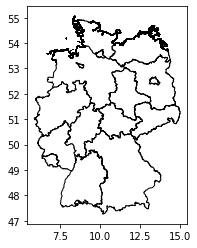

In [12]:
gdf = gpd.read_file('DEU_adm1.shp')
gdf.plot(color='white', edgecolor='black')

In [ ]:
pip install folium

In [16]:
import folium

In [14]:
path = gpd.datasets.get_path('nybb')
df = gpd.read_file(path)
df.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [17]:
m = folium.Map(location=[40.70, -73.94], zoom_start=10, tiles='CartoDB positron')
m